Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using 
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
inconsistencies, use any of the suitable techniques to deal with them. 
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable 
techniques to deal with them. 
3. Apply data transformations on at least one of the variables. The purpose of this 
transformation should be one of the following reasons: to change the scale for better 
understanding of the variable, to convert a non-linear relation into a linear one, or to 
decrease the skewness and convert the distribution into a normal distribution. 
Reason and document your approach properly

In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

dataset=pd.read_csv(r"C:\Users\Windows 10\OneDrive\Desktop\COLLEGE\TE Sppu Practicals\DSBDA\p2\SP2.csv")
print(dataset)

    Roll Nationality    WT    AI  DSBDA        AVG GRADE   PG
0      1       INDIA  72.0  72.0   74.0  72.666667     A  YES
1      2       JAPAN  70.0  69.0   40.0  59.666667     B  YES
2      3       INDIA   NaN  40.0   60.0  50.000000     C   NO
3      4          US  50.0  30.0    NaN  40.000000     D  YES
4      5          UK  51.0  52.0   53.0  52.000000     C   NO
5      6       INDIA  45.0  40.0    NaN  42.500000     D  YES
6      7       JAPAN  75.0  89.0   56.0  73.333333     A  YES
7      8       INDIA  50.0  47.0   56.0  51.000000     C  YES
8      9          US  50.0   NaN   60.0  55.000000     C   NO
9     10          UK  60.0   NaN   80.0  70.000000     A  YES
10    11       INDIA  75.0  29.0   45.0  49.666667     C   NO
11    12       JAPAN  45.0  15.0   40.0  33.333333     D  YES
12    13       INDIA  47.0   NaN   85.0  66.000000     B  YES
13    14       JAPAN  47.0  46.0   56.0  49.666667     C  YES
14    15       INDIA   NaN  75.0   80.0  77.500000     A   NO
15    16

In [5]:
dataset.dtypes

Roll             int64
Nationality     object
WT             float64
AI             float64
DSBDA          float64
AVG            float64
GRADE           object
PG              object
dtype: object

In [6]:
dataset.select_dtypes('object').apply(pd.Series.nunique,axis=0)

Nationality    4
GRADE          4
PG             2
dtype: int64

In [7]:
dataset.select_dtypes(float).apply(pd.Series.nunique,axis=0)

WT        9
AI       13
DSBDA     9
AVG      16
dtype: int64

In [8]:
fd=dataset.select_dtypes(object)
fd.describe()

,Nationality,GRADE,PG
count,18,18,18
unique,4,4,2
top,INDIA,C,YES
freq,9,8,12


In [9]:
fd=dataset.select_dtypes(float)
fd.describe()

,WT,AI,DSBDA,AVG
count,16.000000,14.000000,15.000000,18.000000
mean,54.437500,50.785714,60.466667,55.259259
std,11.792476,20.218722,14.831755,12.299001
min,42.000000,15.000000,40.000000,33.333333
25%,46.500000,40.000000,50.500000,49.666667
50%,50.000000,49.000000,56.000000,51.500000
75%,62.500000,65.750000,74.000000,64.416667
max,75.000000,89.000000,85.000000,77.500000


In [10]:
fd=dataset.select_dtypes(int)
fd.describe()


,Roll
count,18.000000
mean,9.500000
std,5.338539
min,1.000000
25%,5.250000
50%,9.500000
75%,13.750000
max,18.000000


In [11]:
dataset.isnull().sum()

Roll           0
Nationality    0
WT             2
AI             4
DSBDA          3
AVG            0
GRADE          0
PG             0
dtype: int64

In [12]:
dataset["WT"].mean()

54.4375

In [13]:
dataset["AI"].median()

49.0

In [14]:
dataset["DSBDA"].mode()

0    56.0
Name: DSBDA, dtype: float64

In [ ]:
dataset.fillna(dataset.mean())
dataset.fillna(dataset.median())  #will not work as my dataset contain non numeric values 

In [16]:
x=dataset["WT"].mean()
dataset["WT"]=dataset["WT"].fillna(x)
dataset["WT"]

0     72.0000
1     70.0000
2     54.4375
3     50.0000
4     51.0000
5     45.0000
6     75.0000
7     50.0000
8     50.0000
9     60.0000
10    75.0000
11    45.0000
12    47.0000
13    47.0000
14    54.4375
15    45.0000
16    47.0000
17    42.0000
Name: WT, dtype: float64

In [17]:
x=dataset["AI"].median()
dataset["AI"]=dataset["AI"].fillna(x)
dataset["AI"]

0     72.0
1     69.0
2     40.0
3     30.0
4     52.0
5     40.0
6     89.0
7     47.0
8     49.0
9     49.0
10    29.0
11    15.0
12    49.0
13    46.0
14    75.0
15    56.0
16    49.0
17    51.0
Name: AI, dtype: float64

In [18]:
x=dataset["DSBDA"].mode()
dataset["DSBDA"]=dataset["DSBDA"].fillna(x)
dataset["DSBDA"]

0     74.0
1     40.0
2     60.0
3      NaN
4     53.0
5      NaN
6     56.0
7     56.0
8     60.0
9     80.0
10    45.0
11    40.0
12    85.0
13    56.0
14    80.0
15    48.0
16     NaN
17    74.0
Name: DSBDA, dtype: float64

In [19]:
dataset["WT"]=dataset["WT"].replace(np.nan,dataset["WT"].mean())
dataset["WT"]

0     72.0000
1     70.0000
2     54.4375
3     50.0000
4     51.0000
5     45.0000
6     75.0000
7     50.0000
8     50.0000
9     60.0000
10    75.0000
11    45.0000
12    47.0000
13    47.0000
14    54.4375
15    45.0000
16    47.0000
17    42.0000
Name: WT, dtype: float64

In [20]:
dataset["WT"]=dataset["WT"].replace(np.nan,dataset["WT"].mean())
dataset["WT"]

0     72.0000
1     70.0000
2     54.4375
3     50.0000
4     51.0000
5     45.0000
6     75.0000
7     50.0000
8     50.0000
9     60.0000
10    75.0000
11    45.0000
12    47.0000
13    47.0000
14    54.4375
15    45.0000
16    47.0000
17    42.0000
Name: WT, dtype: float64

In [21]:
dataset["PG"]=dataset["PG"].fillna(method='ffill')
dataset["PG"]

0     YES
1     YES
2      NO
3     YES
4      NO
5     YES
6     YES
7     YES
8      NO
9     YES
10     NO
11    YES
12    YES
13    YES
14     NO
15    YES
16     NO
17    YES
Name: PG, dtype: object

In [22]:
newdata=dataset.dropna()
newdata

,Roll,Nationality,WT,AI,DSBDA,AVG,GRADE,PG
0,1,INDIA,72.0000,72.0,74.0,72.666667,A,YES
1,2,JAPAN,70.0000,69.0,40.0,59.666667,B,YES
2,3,INDIA,54.4375,40.0,60.0,50.000000,C,NO
4,5,UK,51.0000,52.0,53.0,52.000000,C,NO
6,7,JAPAN,75.0000,89.0,56.0,73.333333,A,YES
7,8,INDIA,50.0000,47.0,56.0,51.000000,C,YES
8,9,US,50.0000,49.0,60.0,55.000000,C,NO
9,10,UK,60.0000,49.0,80.0,70.000000,A,YES
10,11,INDIA,75.0000,29.0,45.0,49.666667,C,NO
11,12,JAPAN,45.0000,15.0,40.0,33.333333,D,YES


In [23]:
newdata=dataset.dropna(how='all')
newdata


,Roll,Nationality,WT,AI,DSBDA,AVG,GRADE,PG
0,1,INDIA,72.0000,72.0,74.0,72.666667,A,YES
1,2,JAPAN,70.0000,69.0,40.0,59.666667,B,YES
2,3,INDIA,54.4375,40.0,60.0,50.000000,C,NO
3,4,US,50.0000,30.0,NaN,40.000000,D,YES
4,5,UK,51.0000,52.0,53.0,52.000000,C,NO
5,6,INDIA,45.0000,40.0,NaN,42.500000,D,YES
6,7,JAPAN,75.0000,89.0,56.0,73.333333,A,YES
7,8,INDIA,50.0000,47.0,56.0,51.000000,C,YES
8,9,US,50.0000,49.0,60.0,55.000000,C,NO
9,10,UK,60.0000,49.0,80.0,70.000000,A,YES


In [24]:
newdata=dataset.dropna(how='any')
newdata


,Roll,Nationality,WT,AI,DSBDA,AVG,GRADE,PG
0,1,INDIA,72.0000,72.0,74.0,72.666667,A,YES
1,2,JAPAN,70.0000,69.0,40.0,59.666667,B,YES
2,3,INDIA,54.4375,40.0,60.0,50.000000,C,NO
4,5,UK,51.0000,52.0,53.0,52.000000,C,NO
6,7,JAPAN,75.0000,89.0,56.0,73.333333,A,YES
7,8,INDIA,50.0000,47.0,56.0,51.000000,C,YES
8,9,US,50.0000,49.0,60.0,55.000000,C,NO
9,10,UK,60.0000,49.0,80.0,70.000000,A,YES
10,11,INDIA,75.0000,29.0,45.0,49.666667,C,NO
11,12,JAPAN,45.0000,15.0,40.0,33.333333,D,YES


In [25]:
dataset["PG"]=dataset["PG"].fillna(method='ffill')
dataset["PG"]

0     YES
1     YES
2      NO
3     YES
4      NO
5     YES
6     YES
7     YES
8      NO
9     YES
10     NO
11    YES
12    YES
13    YES
14     NO
15    YES
16     NO
17    YES
Name: PG, dtype: object

In [32]:
import matplotlib.pyplot as plt

In [26]:
dataset.iloc[0:18,2:5]

,WT,AI,DSBDA
0,72.0000,72.0,74.0
1,70.0000,69.0,40.0
2,54.4375,40.0,60.0
3,50.0000,30.0,NaN
4,51.0000,52.0,53.0
5,45.0000,40.0,NaN
6,75.0000,89.0,56.0
7,50.0000,47.0,56.0
8,50.0000,49.0,60.0
9,60.0000,49.0,80.0


Matplotlib is building the font cache; this may take a moment.


<Axes: >

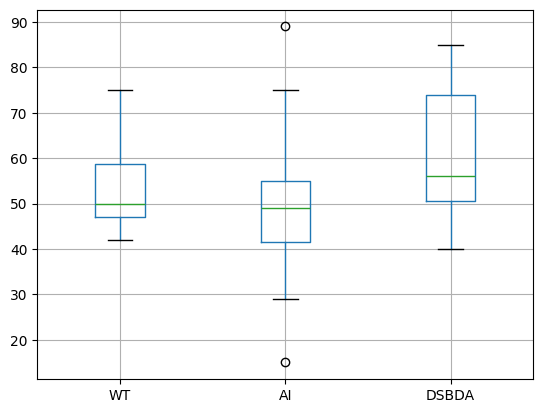

In [27]:
call=["WT","AI","DSBDA"]
dataset.boxplot(call)

In [28]:
print(np.where(dataset['AI']>75 ))

(array([6], dtype=int64),)


In [29]:
print(np.where((dataset['WT']>70) & (dataset['AI']<50 )))

(array([10], dtype=int64),)


In [30]:
print(np.where(dataset['DSBDA']>80 ))

(array([12], dtype=int64),)


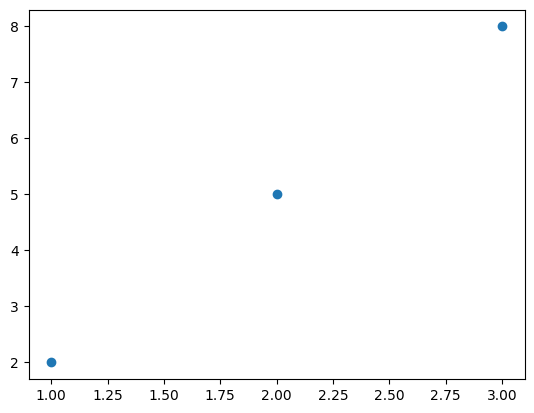

Text(0, 0.5, 'time')

In [33]:
x=[1,2,3]
y=[2,5,8]
plt.scatter(x,y)
plt.show()
plt.title("Plot",fontsize=10)
plt.xlabel("day",fontsize=20)
plt.ylabel("time",fontsize=20)

In [34]:
z=range(len(dataset["WT"]))
z
x=dataset["WT"]
y=z
plt.scatter(x,y)

In [ ]:
from scipy import stats
dataset1=dataset.fillna(dataset.mean())
dataset1

In [ ]:
z=np.abs(stats.zscore(dataset1["WT"]))
z

threshold=0.18
sample=np.where(z<threshold)
sample

In [38]:
sort_ai=sorted(dataset["AI"])
sort_ai

[15.0,
 29.0,
 30.0,
 40.0,
 40.0,
 46.0,
 47.0,
 49.0,
 49.0,
 49.0,
 49.0,
 51.0,
 52.0,
 56.0,
 69.0,
 72.0,
 75.0,
 89.0]

In [39]:
sort_dsbda=sorted(dataset["WT"])
sort_dsbda

[42.0,
 45.0,
 45.0,
 45.0,
 47.0,
 47.0,
 47.0,
 50.0,
 50.0,
 50.0,
 51.0,
 54.4375,
 54.4375,
 60.0,
 70.0,
 72.0,
 75.0,
 75.0]

In [40]:
q1=np.percentile(sort_dsbda,25)
q3=np.percentile(sort_dsbda,75)
print(q1,q3)
iqr=q3-q1
iqr

47.0 58.609375


11.609375

In [41]:
lower_bond=q1-(1.5*iqr)
upper_bond=q3+(1.5*iqr)
print(lower_bond,upper_bond)

29.5859375 76.0234375


In [42]:
r_outlier=[]
for i in sort_dsbda:
    if((i<lower_bond) or (i>upper_bond)):
        r_outlier.append(i)
r_outlier

[]

In [ ]:
new_data=dataset

for i in sample:
    new_data.drop(i,inplace=True)
new_data

In [45]:
new_data1=dataset

for i in r_outlier:
    new_data1.drop(i,inplace=True)
new_data1

,Roll,Nationality,WT,AI,DSBDA,AVG,GRADE,PG
0,1,INDIA,72.0000,72.0,74.0,72.666667,A,YES
1,2,JAPAN,70.0000,69.0,40.0,59.666667,B,YES
2,3,INDIA,54.4375,40.0,60.0,50.000000,C,NO
3,4,US,50.0000,30.0,NaN,40.000000,D,YES
4,5,UK,51.0000,52.0,53.0,52.000000,C,NO
5,6,INDIA,45.0000,40.0,NaN,42.500000,D,YES
6,7,JAPAN,75.0000,89.0,56.0,73.333333,A,YES
7,8,INDIA,50.0000,47.0,56.0,51.000000,C,YES
8,9,US,50.0000,49.0,60.0,55.000000,C,NO
9,10,UK,60.0000,49.0,80.0,70.000000,A,YES
